
## Homework 1: Part A2: Linear Regression with multiple variables
## Experiments with the Boston housing data

## Instructions 
This file contains code that helps you get started on linear regression with many variables. You will need to complete functions in **linear_regressor_multi.py** and **utils.py**. The only changes to make in this notebook are marked with **TODO**:

## Reading data
will start by loading and displaying some values from the full Boston housing dataset with thirteen features of census tracts that are believed to be predictive of the median home price in the tract (see **housing.names.txt** for a full description of these features). By looking at the values, you will note that the values of some of the features are  about 1000 times the values of others.

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plot_utils, utils
from linear_regressor_multi import LinearRegressor_Multi, LinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

print('Reading data ...')
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
df

Reading data ...


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Linear regression with multiple variables
When features differ by orders of magnitude, feature scaling becomes important
to make  gradient descent converge  quickly.
**Your task here is to complete the code in feature_normalize.py in utils.py**. 
- First, subtract the mean value of each feature from the dataset. 
- Second, divide the feature values by their respective standard deviations. The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within two standard deviations of the mean).  

You will do this for all the features and your code should work with
datasets of all sizes (any number of features/examples). Note that each
column of the matrix X corresponds to one feature.
When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations.

Then, run the computation in the cell below.

In [2]:
X = df.values
y = bdata.target

# need to scale the features (use zero mean scaling)

X_norm,mu,sigma = utils.feature_normalize(X)

Running gradient descent ..
Theta computed by gradient descent: [ 2.25328063e+01 -9.21597716e-01  1.07007562e+00  1.05469840e-01
  6.86800441e-01 -2.05006613e+00  2.68075474e+00  1.39444430e-02
 -3.10628281e+00  2.57282283e+00 -1.97535499e+00 -2.05719700e+00
  8.48665373e-01 -3.74016957e+00]


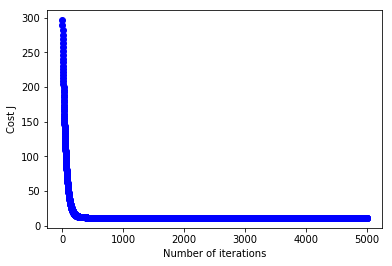

In [3]:
# add intercept term to X_norm

XX = np.vstack([np.ones((X.shape[0],)),X_norm.T]).T

print('Running gradient descent ..')

# set up model and train 

linear_reg3 = LinearReg_SquaredLoss()
J_history3 = linear_reg3.train(XX,y,learning_rate=0.01,num_iters=5000,verbose=False)

# Plot the convergence graph and show it (or save it in fig5.pdf)

plot_utils.plot_data(range(len(J_history3)),J_history3,'Number of iterations','Cost J')
#plt.show()
plt.savefig('fig5.png')

# Display the computed theta

print('Theta computed by gradient descent: %s' % (linear_reg3.theta))

## Predict on unseen data points
After learning the parameter $\theta$, we  want to predict the median home prices for new census tracts. 
Given the thirteen characteristics x of a new census tract, we must first normalize x using the mean and standard deviations that we had previously computed from the training set. Then, we take the dot product of the normalized x (with a 1 prepended (to account for the intercept term) with the parameter vector $\theta$ to make a prediction.
In the cell below, your  final parameter values for $\theta$ will  be used to make predictions on median home values
for an average census tract, characterized by average values for all the thirteen features.  Complete the
calculation in  the indicated lines below. Now run this cell to see what the  prediction of median home value for an average tract is. Remember to scale the features correctly for this prediction.

In [6]:
########################################################################
# TODO:                                                                #
# Predict values for the average home                                  #
# remember to multiply prediction by 10000 using linear_reg3           #
#   One line of code expected; replace pred_cost = 0 line              # 
########################################################################
pred_cost = linear_reg3.predict(np.mean(XX, axis = 0)) * 10000
print('For average home in Boston suburbs, we predict a median home value of %.2f' % (pred_cost))

For average home in Boston suburbs, we predict a median home value of 225328.06


## Normal equations
Using the closed form solution for $\theta$ does not require any feature scaling, and you will get
an exact solution in one calculation: there is no loop until convergence
as in gradient descent.
Complete the code in the method *normal_eqn* in *linear_regressor_multi.py* to  calculate $\theta$. Now make a prediction for the average census tract (same example as in the previous problem). Do the predictions match up? Remember that while you do not need to scale your features, you still
need to add a 1 to the example to have an intercept term ($\theta_0$).

In [7]:
X = df.values
y = bdata.target
XX1 = np.vstack([np.ones((X.shape[0],)),X.T]).T

linear_reg4 = LinearReg_SquaredLoss()

theta_n = linear_reg4.normal_equation(XX1,y)

print('Theta computed by direct solution is: %s' % (theta_n))

########################################################################
# TODO:                                                                #
# Predict values for the average home using theta_n                    #
# remember to multiply prediction by 10000                             #
#   One line of code expected; replace pred_cost = 0 line              # 
########################################################################

pred_cost = np.dot(XX1.mean(0), theta_n)*10000
print('For average home in Boston suburbs, we predict a median home value of %.2f' % (pred_cost))

Theta computed by direct solution is: [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
For average home in Boston suburbs, we predict a median home value of 225328.06


## Exploring convergence of gradient descent
In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and the number of iterations by modifying the call to the **LinearReg** constructor in the cell below.
The next phase will call your train function and run gradient descent  at the chosen learning
rate for the chosen number of iterations. The function should also return the history of $J(\theta)$ values in a vector
$J$. After the last iteration, the  script plots the $J$ values against
the number of the iterations.
If you picked a learning rate within a good range, your plot should look similar
to Figure 5. If your graph looks very different, especially if your value of $J(\theta)$
increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative
steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that
will help you see the overall trend in the curve. Present plots of $J$ as a function of the number of iterations for different learning rates. What are good learning rates and number of iterations for this problem? Include plots and a brief writeup in **writeup.pdf** to justify your choices.

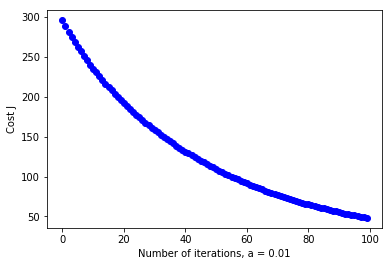

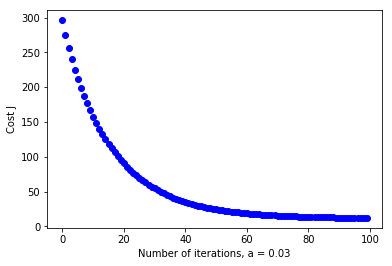

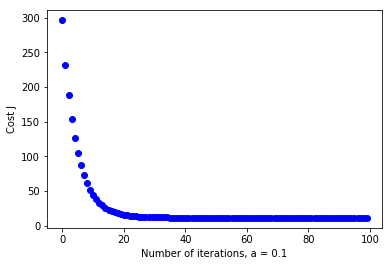

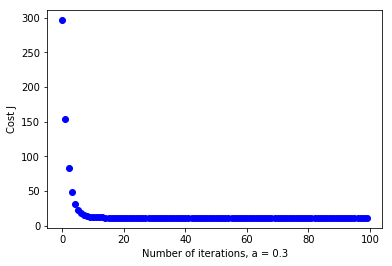

In [12]:
# change the learning_rate and num_iters in the call below to find the 
# best learning rate for this data set.

learning_rates = [0.01, 0.03, 0.1, 0.3]

########################################################################
# TODO:                                                                #
# Produce convergence plots for gradient descent with the rates above  #
# using data (XX,y). Include them in your writeup.                     #
#   4-5 lines of code expected                                         #
########################################################################
for a in learning_rates:
    linear_reg5 = LinearReg_SquaredLoss()
    J_history5 = linear_reg5.train(XX,y,learning_rate=a,num_iters=100,verbose=False)
    plot_utils.plot_data(range(len(J_history5)),J_history5,'Number of iterations, a = ' + str(a),'Cost J')
    plt.savefig('Fig6 a =' + str(a) +'.png')
    